In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

file_path = '/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv'
data = pd.read_csv(file_path)
print(data.head())  # Muestra las primeras filas del archivo


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                     251          15.8263               1015.13   
1                     

In [4]:
X = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
y = data['Pressure (millibars)']


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Redimensionar para el modelo RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Construir el modelo RNN
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 939869.1875 - val_loss: 771195.1250
Epoch 2/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 720485.4375 - val_loss: 582734.8750
Epoch 3/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 540059.5625 - val_loss: 423502.2188
Epoch 4/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 388931.6562 - val_loss: 291942.5625
Epoch 5/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 265232.4688 - val_loss: 187334.5781
Epoch 6/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 167884.8281 - val_loss: 108995.8750
Epoch 7/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 97088.2656 - val_loss: 55839.2188
Epoch 8/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 51056.8828 - val_loss: 25703.9648
Epoch 9/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 26636.7832 - val_loss: 14234.5342
Epoch 10/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 19066.2344 - val_loss: 12597.8643
Epoch 11/50
2412/

In [10]:
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en los datos de prueba: {loss}")


603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11749.8760
Pérdida en los datos de prueba: 12537.791015625


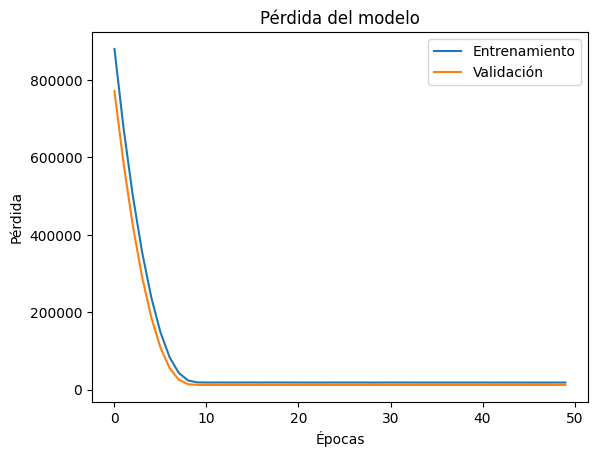

In [11]:
import matplotlib.pyplot as plt

# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [ ]:
# El modelo mostró una capacidad progresiva para reducir
# la pérdida (loss) durante el entrenamiento, especialmente en las
# primeras épocas.

#En la gráfica de pérdida indicó que el modelo alcanza un punto de estabilidad
#

* el modelo mostró una capacidad progresiva para reducir la périda (loss) durante el entrenamiento, especialmente en lass primeras épocas.

* En la gráfica de pérdida indicó que el modelo alcanza un punto de estabilidad, lo que sugiere que las RNN son efectivas para manejar datos secuenciales como los climáticos.

* Las RNN son adecuadas para problemas que involucran dependencia temporal o secuencial, como el análisis de variables climáticas a lo largo del tiempo. Esto se debe a su capacidad para mantener información en memoriay considerar patrones a través de las secuencias.

*Impacto de las decisiones técnicas:
* El optimizador Adam ayudó a ajustar los parámetros de manera eficiente, logrando una convergencia más rápida y precisa.
* Las capas LSTM dentro de la RNN permitieron un manejo robusto de las relaciones temporales entre las variables

*Limitaciones y recomendaciones:
* La calidad de los datos juega un papel crítico, por lo que un análisis más profundo o limpieza adicional podrían perfeccionar los resultados.
